In [ ]:
#  Data Analytics III
#  1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv 
# dataset.
#  2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall 
# on the given dataset

In [1]:
!pip install pandas numpy


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Import necessary libraries
import pandas as pd
import numpy as np

In [4]:
#Read dataset
df = pd.read_csv("iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
# Get unique species from the dataset  
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
 # Extract features (first four columns)  
X = df.iloc[:, 0:4].values #all rows, 0-3 cols  
# Extract target labels (species)  
y = df.iloc[:, 4].values  #all rows, 4th col 
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [9]:
# Import train_test_split  
from sklearn.model_selection import train_test_split 

In [11]:
# Split dataset into 80% training and 20% testing  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
train_size=0.8, random_state=1) 
X_test

array([[5.8, 4. , 1.2, 0.2],
       [5.1, 2.5, 3. , 1.1],
       [6.6, 3. , 4.4, 1.4],
       [5.4, 3.9, 1.3, 0.4],
       [7.9, 3.8, 6.4, 2. ],
       [6.3, 3.3, 4.7, 1.6],
       [6.9, 3.1, 5.1, 2.3],
       [5.1, 3.8, 1.9, 0.4],
       [4.7, 3.2, 1.6, 0.2],
       [6.9, 3.2, 5.7, 2.3],
       [5.6, 2.7, 4.2, 1.3],
       [5.4, 3.9, 1.7, 0.4],
       [7.1, 3. , 5.9, 2.1],
       [6.4, 3.2, 4.5, 1.5],
       [6. , 2.9, 4.5, 1.5],
       [4.4, 3.2, 1.3, 0.2],
       [5.8, 2.6, 4. , 1.2],
       [5.6, 3. , 4.5, 1.5],
       [5.4, 3.4, 1.5, 0.4],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 2.6, 4.4, 1.2],
       [5.4, 3. , 4.5, 1.5],
       [6.7, 3. , 5. , 1.7],
       [5. , 3.5, 1.3, 0.3],
       [7.2, 3.2, 6. , 1.8],
       [5.7, 2.8, 4.1, 1.3],
       [5.5, 4.2, 1.4, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [6.1, 2.8, 4.7, 1.2],
       [6.3, 2.5, 5. , 1.9]])

In [13]:
 # Import LabelEncoder  
from sklearn.preprocessing import LabelEncoder  

In [15]:
# Encode target labels  
label_encoder = LabelEncoder()  
y = label_encoder.fit_transform(y)  
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
# Importing Gaussian Naive Bayes classifier from scikit-learn.
from sklearn.naive_bayes import GaussianNB

In [18]:
# Creating an instance of the Gaussian Naive Bayes model.
model = GaussianNB()

In [19]:
 # Training the model using the training dataset.
 # The model learns the relationship between input features (X_train) and output labels (y_train).
model.fit(X_train, y_train)
GaussianNB()

GaussianNB()

In [20]:
 # Make predictions on the test set  
y_predicted = model.predict(X_test) 

In [21]:
# Evaluate model accuracy on the test set  
model.score(X_test, y_test) 

0.9666666666666667

In [22]:
# Import evaluation metrics  
from sklearn.metrics import confusion_matrix, classification_report 

In [23]:
# Generate and print confusion matrix  
cm = confusion_matrix(y_test, y_predicted)  
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [24]:
# Create a DataFrame for better visualization of the confusion matrix 
cm_df = pd.DataFrame(cm, index=['SETOSA', 'VERSICOLOR', 'VIRGINICA'], 
columns=['SETOSA', 'VERSICOLOR', 'VIRGINICA'])

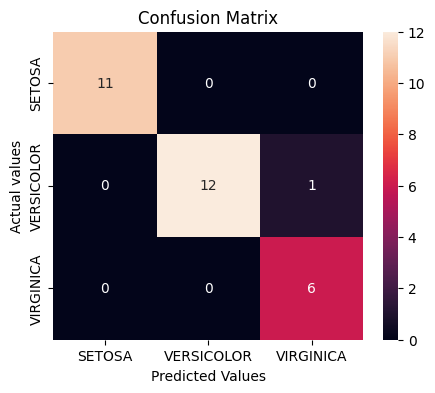

In [25]:
# Import libraries for visualization  
import seaborn as sns  
import matplotlib.pyplot as plt  
# Set figure size  
plt.figure(figsize=(5, 4))  
# Plot confusion matrix as a heatmap with annotations  
sns.heatmap(cm_df, annot=True)  
# Add title and axis labels  
plt.title("Confusion Matrix")  
plt.ylabel("Actual values")  
plt.xlabel("Predicted Values")  
# Display the heatmap  
plt.show()

In [28]:
 # Function to calculate accuracy from confusion matrix values  
def accuracy_cm(tp, fn, fp, tn):  
    # Calculate accuracy as the ratio of correct predictions (TP + TN) to total instances  
    return (tp + tn) / (tp + fn + fp + tn)  


In [30]:
# Define a function to calculate precision using confusion matrix values
def precision_cm(tp, fn, fp, tn):
    # Calculate precision by dividing the number of true positives (tp) by the sum of true positives (tp) and false positives (fp)
    return tp / (tp + fp) 

# Define a function to calculate recall using confusion matrix values
def recall_cm(tp, fn, fp, tn):
    # Calculate recall by dividing the number of true positives (tp) by the sum of true positives (tp) and false negatives (fn)
    return tp / (tp + fn) 
     
# Define a function to calculate F1 score using confusion matrix values
def f1_score(tp, fn, fp, tn):
    # F1 Score is the harmonic mean of Precision and Recall
    # First, we calculate Precision and Recall, then use them to calculate F1 score
    return 2 * (precision_cm(tp, fn, fp, tn) * recall_cm(tp, fn, fp, 
tn)) / (precision_cm(tp, fn, fp, tn) + recall_cm(tp, fn, fp, tn)) 
     
# Define a function to calculate the error rate using confusion matrix values
def error_rate(tp, fn, fp, tn):
    # Error rate is simply 1 minus the accuracy
    return 1 - accuracy_cm(tp, fn, fp, tn)  # Error Rate = 1 - 

#Accuracy
# Extract confusion matrix values for the 'Virginica' class  
tp = cm[2][2]  # True Positives: Correctly predicted as Virginica  
fn = cm[2][0] + cm[2][1]  # False Negatives: Virginica incorrectly predicted as Setosa or Versicolor  
fp = cm[0][2] + cm[1][2]  # False Positives: Setosa or Versicolor incorrectly predicted as Virginica  
tn = cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]  # True Negatives: All non-Virginica correctly not predicted as Virginica  

# Print out the calculated confusion matrix values  
print("For Virginica\n")  
print("tp =", tp)  # True Positives  
print("fn =", fn)  # False Negatives  
print("fp =", fp)  # False Positives  
print("tn =", tn)  # True Negatives  

# Calculate and print evaluation metrics for the 'Virginica' class  
print("Accuracy:", accuracy_cm(tp, fn, fp, tn))  # Accuracy for Virginica  
print("Precision:", precision_cm(tp, fn, fp, tn))  # Precision for Virginica  
print("Recall:", recall_cm(tp, fn, fp, tn))   # Recall for Virginica  
print("F1_Score:", f1_score(tp, fn, fp, tn))   # F1 score for Virginica
print("Error rate:", error_rate(tp, fn, fp, tn))  # Error rate for Virginica 


For Virginica

tp = 6
fn = 0
fp = 1
tn = 23
Accuracy: 0.9666666666666667
Precision: 0.8571428571428571
Recall: 1.0
F1_Score: 0.923076923076923
Error rate: 0.033333333333333326
